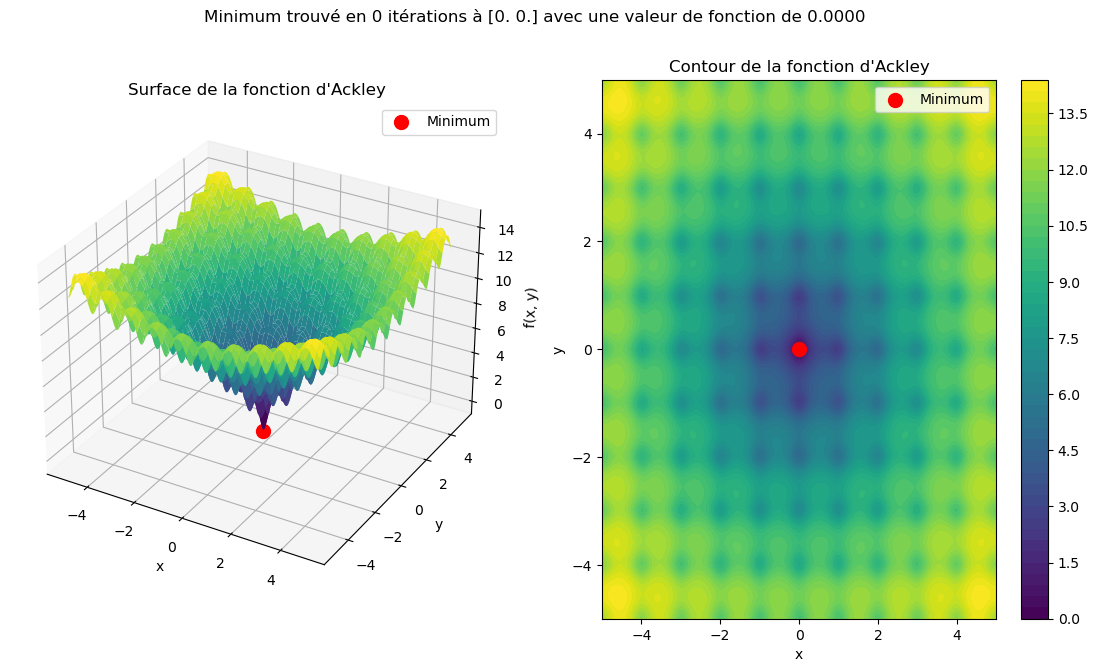

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# Définition de la fonction d'Ackley
def ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    sum1 = np.sum(x**2)
    sum2 = np.sum(np.cos(c * x))
    term1 = -a * np.exp(-b * np.sqrt(sum1 / len(x)))
    term2 = -np.exp(sum2 / len(x))
    return term1 + term2 + a + np.exp(1)

# Création de la grille de points
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)

# Vectorisation de la fonction ackley pour accepter des tableaux de la grille de points
Z = np.vectorize(lambda x, y: ackley(np.array([x, y])))(X, Y)

# Optimisation pour trouver le minimum
x0 = np.array([0, 0])
bounds = [(-5, 5), (-5, 5)]
result = minimize(ackley, x0, bounds=bounds)

# Visualisation
fig = plt.figure(figsize=(14, 7))

# Surface de la fonction
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.scatter(result.x[0], result.x[1], result.fun, color='r', s=100, label='Minimum')
ax.set_title('Surface de la fonction d\'Ackley')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()

# Contour de la fonction et point de minimum
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, Z, levels=50, cmap='viridis')
fig.colorbar(contour, ax=ax2)
ax2.scatter(result.x[0], result.x[1], color='r', s=100, label='Minimum')
ax2.set_title('Contour de la fonction d\'Ackley')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()

# Affichage des résultats
plt.suptitle(f"Minimum trouvé en {result.nit} itérations à {result.x} avec une valeur de fonction de {result.fun:.4f}")
plt.show()


In [8]:

import numpy as np

def gradient_descent(E, grad_E, C_init, alpha=0.01, max_iter=1000, tol=1e-6):
    C = C_init
    for i in range(max_iter):
        grad = grad_E(C)
        C_new = C - alpha * grad
        if np.linalg.norm(C_new - C) < tol:
            break
        C = C_new
    return C

# Exemple d'utilisation
# E est la fonction d'énergie
# grad_E est la fonction pour calculer le gradient de E
# C_init est l'estimation initiale des variables de décision
# alpha est le taux d'apprentissage
# max_iter est le nombre maximal d'itérations
# tol est la tolérance pour la convergence
# C_optimal = gradient_descent(E, grad_E, C_init, alpha=0.01, max_iter=1000, tol=1e-6)


In [10]:
import numpy as np

# Définir la fonction à minimiser
def f(x):
    return x**2  # Exemple de fonction à minimiser : f(x) = x^2

# Calculer le gradient de la fonction à minimiser en x
def grad_f(x):
    return 2 * x  # Le gradient de f(x) = 2 * x

# Algorithme de descente de gradient
def gradient_descent(grad_f, alpha=0.01, max_iter=1000, tol=1e-6):
    # Initialisation des variables
    x = np.random.randn()  # Initialisation aléatoire
    for _ in range(max_iter):
        # Calcul du gradient
        gradient = grad_f(x)
        # Mise à jour des variables
        x = x - alpha * gradient
        # Critère d'arrêt
        if np.abs(gradient) < tol:
            break
    return x

# Exemple d'utilisation
x_optimal = gradient_descent(grad_f)
print("Minimum trouvé:", x_optimal)
print("Valeur de la fonction à ce minimum:", f(x_optimal))


Minimum trouvé: -4.858943539678623e-07
Valeur de la fonction à ce minimum: 2.360933232178463e-13


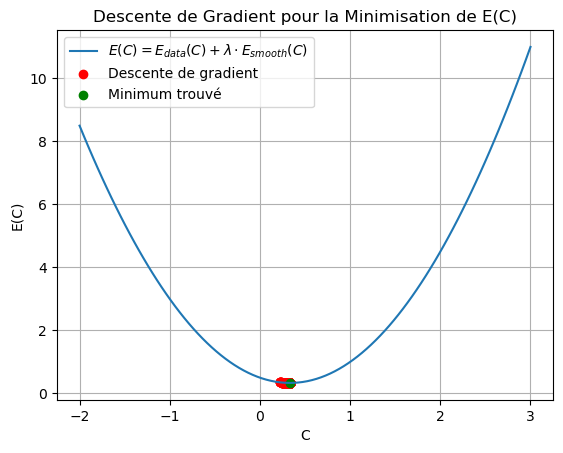

Minimum trouvé: 0.33333301060139386
Valeur de la fonction à ce minimum: 0.3333333333334896
Nombre d'itérations: 420


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Définir les fonctions E_data et E_smooth
def E_data(C):
    return C**2  # Exemple de E_data

def E_smooth(C):
    return (C - 1)**2  # Exemple de E_smooth

# Fonction d'énergie totale
def E(C, lambda_):
    return E_data(C) + lambda_ * E_smooth(C)

# Gradient de E_data
def grad_E_data(C):
    return 2 * C  # Gradient de C^2

# Gradient de E_smooth
def grad_E_smooth(C):
    return 2 * (C - 1)  # Gradient de (C - 1)^2

# Gradient de la fonction d'énergie totale
def grad_E(C, lambda_):
    return grad_E_data(C) + lambda_ * grad_E_smooth(C)

# Algorithme de descente de gradient
def gradient_descent(lambda_, alpha=0.01, max_iter=1000, tol=1e-6):
    # Initialisation des variables
    C = np.random.randn()  # Initialisation aléatoire
    C_history = [C]  # Historique des valeurs de C
    num_iterations = 0  # Initialisation du compteur d'itérations
    for _ in range(max_iter):
        num_iterations += 1
        # Calcul du gradient
        gradient = grad_E(C, lambda_)
        # Mise à jour des variables
        C = C - alpha * gradient
        C_history.append(C)
        # Critère d'arrêt
        if np.abs(gradient) < tol:
            break
    return C, C_history, num_iterations

# Paramètre de régularisation
lambda_ = 0.5

# Exécuter l'algorithme de descente de gradient
C_optimal, C_history, num_iterations = gradient_descent(lambda_)

# Tracer la fonction d'énergie totale
C_values = np.linspace(-2, 3, 100)
E_values = E(C_values, lambda_)
plt.plot(C_values, E_values, label=r'$E(C) = E_{data}(C) + \lambda \cdot E_{smooth}(C)$')

# Tracer le processus de descente de gradient
C_history = np.array(C_history)
plt.scatter(C_history, E(C_history, lambda_), color='red', label='Descente de gradient')

# Marquer le minimum trouvé
plt.scatter(C_optimal, E(C_optimal, lambda_), color='green', label='Minimum trouvé')

plt.xlabel('C')
plt.ylabel('E(C)')
plt.title('Descente de Gradient pour la Minimisation de E(C)')
plt.legend()
plt.grid(True)
plt.show()

print("Minimum trouvé:", C_optimal)
print("Valeur de la fonction à ce minimum:", E(C_optimal, lambda_))
print("Nombre d'itérations:", num_iterations)


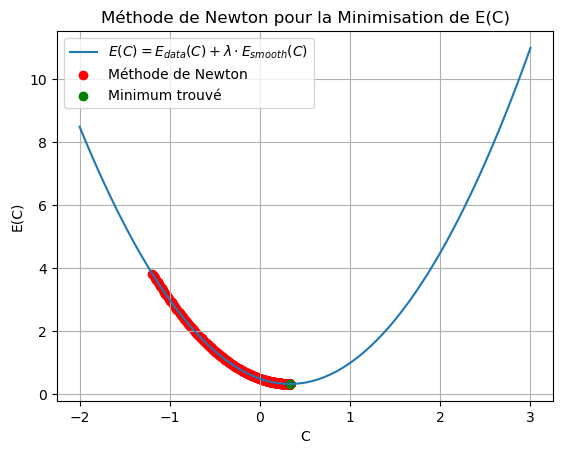

Minimum trouvé: 0.33326741654129427
Valeur de la fonction à ce minimum: 0.3333333398508685
Nombre d'itérations: 1000


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Définir les fonctions E_data et E_smooth
def E_data(C):
    return C**2  # Exemple de E_data

def E_smooth(C):
    return (C - 1)**2  # Exemple de E_smooth

# Fonction d'énergie totale
def E(C, lambda_):
    return E_data(C) + lambda_ * E_smooth(C)

# Gradient de E_data
def grad_E_data(C):
    return 2 * C  # Gradient de C^2

# Gradient de E_smooth
def grad_E_smooth(C):
    return 2 * (C - 1)  # Gradient de (C - 1)^2

# Gradient de la fonction d'énergie totale
def grad_E(C, lambda_):
    return grad_E_data(C) + lambda_ * grad_E_smooth(C)

# Hessienne de E_data
def hess_E_data(C):
    return 2  # Hessienne de C^2 est constante 2

# Hessienne de E_smooth
def hess_E_smooth(C):
    return 2  # Hessienne de (C - 1)^2 est constante 2

# Hessienne de la fonction d'énergie totale
def hess_E(C, lambda_):
    return hess_E_data(C) + lambda_ * hess_E_smooth(C)

# Algorithme de Newton
def newton_method(lambda_, alpha=0.01, max_iter=1000, tol=1e-6):
    # Initialisation des variables
    C = np.random.randn()  # Initialisation aléatoire
    C_history = [C]  # Historique des valeurs de C
    num_iterations = 0  # Compteur d'itérations
    for _ in range(max_iter):
        num_iterations += 1
        # Calcul du gradient et de la Hessienne
        gradient = grad_E(C, lambda_)
        hessian = hess_E(C, lambda_)
        # Mise à jour des variables
        C = C - alpha * gradient / hessian
        C_history.append(C)
        # Critère d'arrêt
        if np.abs(gradient) < tol:
            break
    return C, C_history, num_iterations

# Paramètre de régularisation
lambda_ = 0.5

# Exécuter l'algorithme de Newton
C_optimal, C_history, num_iterations = newton_method(lambda_)

# Tracer la fonction d'énergie totale
C_values = np.linspace(-2, 3, 100)
E_values = E(C_values, lambda_)
plt.plot(C_values, E_values, label=r'$E(C) = E_{data}(C) + \lambda \cdot E_{smooth}(C)$')

# Tracer le processus de Newton
C_history = np.array(C_history)
plt.scatter(C_history, E(C_history, lambda_), color='red', label='Méthode de Newton')

# Marquer le minimum trouvé
plt.scatter(C_optimal, E(C_optimal, lambda_), color='green', label='Minimum trouvé')

plt.xlabel('C')
plt.ylabel('E(C)')
plt.title('Méthode de Newton pour la Minimisation de E(C)')
plt.legend()
plt.grid(True)
plt.show()

print("Minimum trouvé:", C_optimal)
print("Valeur de la fonction à ce minimum:", E(C_optimal, lambda_))
print("Nombre d'itérations:", num_iterations)


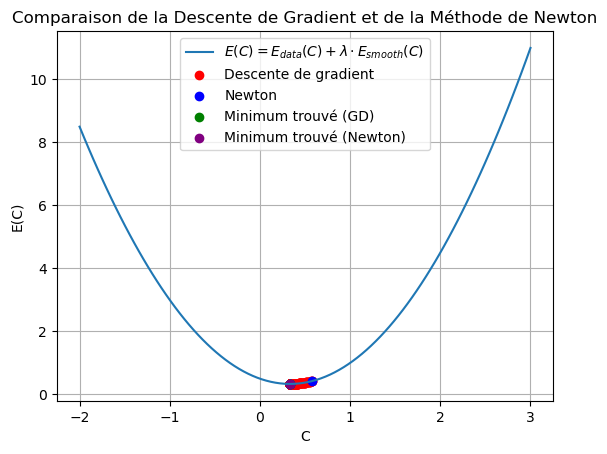

Minimum trouvé (Descente de Gradient): 0.3333336543865223
Valeur de la fonction à ce minimum (GD): 0.3333333333334879
Nombre d'itérations (Descente de Gradient): 445
Minimum trouvé (Newton): 0.3333333333333333
Valeur de la fonction à ce minimum (Newton): 0.33333333333333337
Nombre d'itérations (Newton): 2


In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Définir les fonctions E_data et E_smooth
def E_data(C):
    return C**2  # Exemple de E_data

def E_smooth(C):
    return (C - 1)**2  # Exemple de E_smooth

# Fonction d'énergie totale
def E(C, lambda_):
    return E_data(C) + lambda_ * E_smooth(C)

# Gradient de E_data
def grad_E_data(C):
    return 2 * C  # Gradient de C^2

# Gradient de E_smooth
def grad_E_smooth(C):
    return 2 * (C - 1)  # Gradient de (C - 1)^2

# Gradient de la fonction d'énergie totale
def grad_E(C, lambda_):
    return grad_E_data(C) + lambda_ * grad_E_smooth(C)

# Hessienne de la fonction d'énergie totale
def hessian_E(C, lambda_):
    return 2 + 2 * lambda_  # Hessienne de la somme de deux quadratiques

# Algorithme de descente de gradient
def gradient_descent(C_initial, lambda_, alpha=0.01, max_iter=1000, tol=1e-6):
    # Initialisation des variables
    C = C_initial  # Utilisation de l'initialisation donnée
    C_history = [C]  # Historique des valeurs de C
    num_iterations = 0  # Initialisation du compteur d'itérations
    for _ in range(max_iter):
        num_iterations += 1
        # Calcul du gradient
        gradient = grad_E(C, lambda_)
        # Mise à jour des variables
        C = C - alpha * gradient
        C_history.append(C)
        # Critère d'arrêt
        if np.abs(gradient) < tol:
            break
    return C, C_history, num_iterations

# Algorithme de Newton
def newton_method(C_initial, lambda_, max_iter=1000, tol=1e-6):
    # Initialisation des variables
    C = C_initial  # Utilisation de l'initialisation donnée
    C_history = [C]  # Historique des valeurs de C
    num_iterations = 0  # Initialisation du compteur d'itérations
    for _ in range(max_iter):
        num_iterations += 1
        # Calcul du gradient et de la hessienne
        gradient = grad_E(C, lambda_)
        hessian = hessian_E(C, lambda_)
        # Mise à jour des variables
        if np.abs(hessian) < 1e-10:
            break  # Pour éviter la division par zéro
        C = C - gradient / hessian
        C_history.append(C)
        # Critère d'arrêt
        if np.abs(gradient) < tol:
            break
    return C, C_history, num_iterations

# Paramètre de régularisation
lambda_ = 0.5

# Initialiser la même valeur de départ pour les deux algorithmes pour une comparaison équitable
initial_C = np.random.randn()

# Exécuter l'algorithme de descente de gradient
C_optimal_gd, C_history_gd, num_iterations_gd = gradient_descent(initial_C, lambda_, alpha=0.01, max_iter=1000, tol=1e-6)

# Exécuter l'algorithme de Newton
C_optimal_newton, C_history_newton, num_iterations_newton = newton_method(initial_C, lambda_, max_iter=1000, tol=1e-6)

# Tracer la fonction d'énergie totale
C_values = np.linspace(-2, 3, 100)
E_values = E(C_values, lambda_)
plt.plot(C_values, E_values, label=r'$E(C) = E_{data}(C) + \lambda \cdot E_{smooth}(C)$')

# Tracer le processus de descente de gradient
C_history_gd = np.array(C_history_gd)
plt.scatter(C_history_gd, E(C_history_gd, lambda_), color='red', label='Descente de gradient')

# Tracer le processus de Newton
C_history_newton = np.array(C_history_newton)
plt.scatter(C_history_newton, E(C_history_newton, lambda_), color='blue', label='Newton')

# Marquer le minimum trouvé
plt.scatter(C_optimal_gd, E(C_optimal_gd, lambda_), color='green', label='Minimum trouvé (GD)')
plt.scatter(C_optimal_newton, E(C_optimal_newton, lambda_), color='purple', label='Minimum trouvé (Newton)')

plt.xlabel('C')
plt.ylabel('E(C)')
plt.title('Comparaison de la Descente de Gradient et de la Méthode de Newton')
plt.legend()
plt.grid(True)
plt.show()

print("Minimum trouvé (Descente de Gradient):", C_optimal_gd)
print("Valeur de la fonction à ce minimum (GD):", E(C_optimal_gd, lambda_))
print("Nombre d'itérations (Descente de Gradient):", num_iterations_gd)

print("Minimum trouvé (Newton):", C_optimal_newton)
print("Valeur de la fonction à ce minimum (Newton):", E(C_optimal_newton, lambda_))
print("Nombre d'itérations (Newton):", num_iterations_newton)
